<h1>Data Setup + ZScore</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_handler import zscore_data, apply_zscore

X = np.array([
    [-2, 1],
    [-5, -4],
    [-3, 1],
    [0, 3],
    [-8, 11],
    [-2, 5],
    [1, 0],
    [5, -1],
    [-1, -3],
    [6, 1]
])

Y = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
classes = np.unique(Y)
m, N = X.shape
class_count = Y.shape
X, Y, X.shape, Y.shape, class_count, classes

(array([[-2,  1],
        [-5, -4],
        [-3,  1],
        [ 0,  3],
        [-8, 11],
        [-2,  5],
        [ 1,  0],
        [ 5, -1],
        [-1, -3],
        [ 6,  1]]),
 array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2]),
 (10, 2),
 (10,),
 (10,),
 array([1, 2]))

In [2]:
mean, std = zscore_data(X)
zX = apply_zscore(mean, std, X)
zX.shape, zX

((10, 2),
 array([[-0.26015724, -0.09359019],
        [-0.96967699, -1.2634676 ],
        [-0.49666382, -0.09359019],
        [ 0.21285592,  0.37436077],
        [-1.67919674,  2.24616461],
        [-0.26015724,  0.84231173],
        [ 0.44936251, -0.32756567],
        [ 1.39538884, -0.56154115],
        [-0.02365066, -1.02949211],
        [ 1.63189542, -0.09359019]]))

<h1>2D Plot of Datapoints</h1>

[[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]
 [-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]]
(5, 2) [[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]] [1 1 1 1 1]
(5, 2) [[-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]] [2 2 2 2 2]


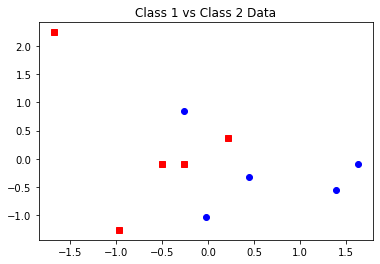

In [4]:
plt.title("Class 1 vs Class 2 Data")
# X_1 = zX.T[0]
# X_2 = zX.T[1]
# plt.scatter(X_1, Y[Y==1], marker="s", c="red")
# plt.scatter(X_2, Y[Y==2], marker="o", c="blue")
# print(X)
print(zX)
X_1 = zX[Y==1]
X_2 = zX[Y==2]
print(X_1.shape, X_1, Y[Y==1])
print(X_2.shape, X_2, Y[Y==2])

plt.plot(X_1[:, 0], X_1[:,1], marker="s", c="red", linestyle = 'None')
plt.plot(X_2[:, 0], X_2[:,1], marker="o", c="blue", linestyle = 'None')

plt.show()

<h1>Principle Component Analysis</h1>

In [5]:
def PCA(data):
    m, N = data.shape
    sigma = np.cov(data.T, ddof=1)
    print(sigma)
    eigenvectors, eigenvalues = np.linalg.eig(sigma)
    print(eigenvectors, eigenvalues)
    max_values = get_max_val(eigenvectors, eigenvalues)
    print(max_values)
    projected_data = np.dot(data, max_values)
    return projected_data

def get_max_val(vectors, values):
    max_vector_indices = np.argmax(vectors)
    max_ev = values[:, max_vector_indices]
    return max_ev

In [6]:
PCA_data = PCA(zX)
PCA_data

[[ 1.         -0.40826218]
 [-0.40826218  1.        ]]
[1.40826218 0.59173782] [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[ 0.70710678 -0.70710678]


(array([-0.11778069,  0.20774133, -0.2850161 , -0.11420117, -2.77564963,
        -0.77956329,  0.54937118,  1.38375847,  0.71123731,  1.22010258]),
 array([ 0.70710678, -0.70710678]))

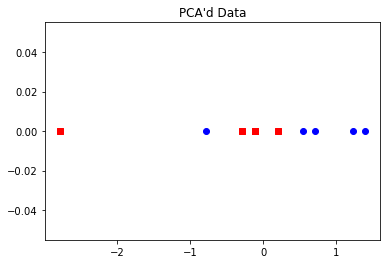

In [7]:
zero_y = np.zeros((PCA_data.shape))

plt.title("PCA'd Data")
plt.scatter(PCA_data[Y==1], zero_y[Y==1], marker="s", c="red")
plt.scatter(PCA_data[Y==2], zero_y[Y==2], marker="o", c="blue")
plt.show()

<h1>Linear Discriminant Analysis</h1>

In [8]:
# Lecture Example - LDA
C1 = np.array([[1,2], [2,3], [3,3], [4,5], [5,5]])
C2 = np.array([[1,0], [2,1], [3,1], [3,2], [5,3],[6,5]])
means, stds = zscore_data(np.vstack((C1, C2)))
C1 = apply_zscore(means, stds, C1)
C2 = apply_zscore(means, stds, C2)
mu_1 = np.mean(C1, axis=0)
mu_2 = np.mean(C2, axis=0)
Sb = np.dot(np.array([(mu_1-mu_2)]).T, np.array([(mu_1 - mu_2)]))

w1 = np.dot((C1-mu_1).T, (C1-mu_1))
w2 = np.dot((C2-mu_2).T, (C2-mu_2))
Sw = np.linalg.pinv(w1 + w2)
Sw_ = np.array([[1.10, -1.19],[-1.19, 1.42]])
eSb = np.array([[0.04, -0.18],[-0.18, 0.85]])
assert(Sw.all() == Sw_.all())
assert(eSb.all() == Sb.all())

prod_ = np.dot(Sw, Sb)
ew_cov, ev_cov = np.linalg.eig(prod_)
max_ev_indexes = np.argmax(ew_cov)
max_ev = np.array([ev_cov.T[max_ev_indexes]]).T
max_ev # Direction of Projection

array([[ 0.64911357],
       [-0.76069151]])

In [14]:
X_1 = zX[Y==1]
X_2 = zX[Y==2]
mu_1 = np.mean(X_1, axis=0)
mu_2 = np.mean(X_2, axis=0)
w1 = np.dot((C1-mu_1).T, (C1-mu_1))
w2 = np.dot((C2-mu_2).T, (C2-mu_2))
mu_1, mu_2, w1, w2

(array([-0.63856777,  0.23397548]),
 array([ 0.63856777, -0.23397548]),
 array([[5.01867427, 3.48009605],
        [3.48009605, 2.74566485]]),
 array([[8.06998374, 6.14645297],
        [6.14645297, 5.5057763 ]]))

In [21]:
Sb = np.dot(np.array([(mu_1-mu_2)]).T, np.array([(mu_1 - mu_2)]))
w1 = (np.dot((X_1-mu_1).T, (X_1-mu_1)))
w2 = (np.dot((X_2-mu_2).T, (X_2-mu_2)))

Sw = np.linalg.pinv(w1 + w2)
prod = np.dot(Sw, Sb)
print(prod)
ew_cov, ev_cov = np.linalg.eig(prod)
print(ew_cov, ev_cov)
max_ev_indexes = np.argmax(ew_cov)
max_ev = np.array([ev_cov.T[max_ev_indexes]]).T
max_ev # Direction of Projection

[[ 0.3387485  -0.1241197 ]
 [ 0.01667254 -0.00610893]]
[3.32639570e-01 6.07153217e-18] [[0.99879099 0.34403943]
 [0.04915855 0.9389552 ]]


array([[0.99879099],
       [0.04915855]])

In [22]:
LDA_data = np.dot(zX, max_ev)
LDA_data, LDA_data.shape

(array([[-0.26444347],
        [-1.03061487],
        [-0.50066411],
        [ 0.23100161],
        [-1.56674837],
        [-0.21843588],
        [ 0.43271657],
        [ 1.36609725],
        [-0.0742304 ],
        [ 1.62532168]]),
 (10, 1))

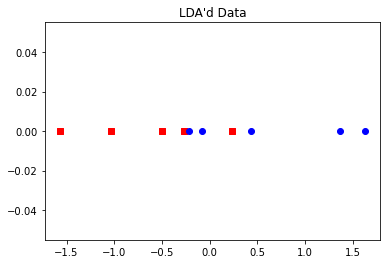

In [23]:
zero_y = np.zeros((LDA_data.shape))

plt.title("LDA'd Data")
plt.scatter(LDA_data[Y==1], zero_y[Y==1], marker="s", c="red")
plt.scatter(LDA_data[Y==2], zero_y[Y==2], marker="o", c="blue")
plt.show()